In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

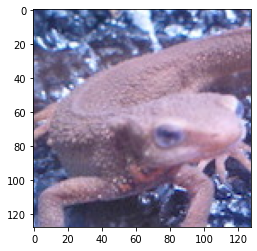

In [2]:
img = cv2.imread("../imori.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
def bgr_to_gray(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()
    output_image = (0.2126*r + 0.7152*g + 0.0722*b).astype("uint8")
    return output_image

In [4]:
def otsu_binarization(img_gray):
    # Otsu's binarization algorithm
    max_variance, threshold = -1, -1
    for v in range(0, 256):
        c0 = np.count_nonzero(img_gray < v)
        c1 = img_gray.shape[0] * img_gray.shape[1] - c0
        v0 = img_gray[np.where(img_gray < v)]
        v1 = img_gray[np.where(img_gray >= v)]
        m0 = np.mean(v0) if len(v0) > 0 else 0
        m1 = np.mean(v1) if len(v1) > 0 else 0
        variance = c0 * c1 * ((m0-m1)**2)
        if variance > max_variance:
            max_variance = variance
            threshold = v

    print("image shape =", img_gray.shape)
    print("optimal threshold =", threshold)
    img_binary = np.vectorize(lambda x: 0 if x < threshold else 255)(img_gray)
    return img_binary

In [5]:
# 収縮
def morphology_erode(img, iteration=1):
    H, W = img.shape
    input_img = np.pad(img, (1, 1), "edge")
    
    K = np.array(( (0, 1, 0), (1, 1, 1), (0, 1, 0) ), dtype=np.int)
    for t in range(iteration):
        output_img = np.ones((H+2, W+2)) * 255
        for i in range(1, H+1):
            for j in range(1, W+1):
                if np.sum(K * input_img[i-1:i+2, j-1:j+2]) < 255*5:
                    output_img[i, j] = 0
        input_img = output_img.copy()
    output_img = input_img[1:1+H, 1:1+W]
    return output_img

In [6]:
# 膨張
def morphology_dilate(img, iteration=1):
    H, W = img.shape
    input_img = np.pad(img, (1, 1), "edge")
    
    K = np.array(( (0, 1, 0), (1, 1, 1), (0, 1, 0) ), dtype=np.int)
    for t in range(iteration):
        output_img = np.zeros((H+2, W+2))
        for i in range(1, H+1):
            for j in range(1, W+1):
                if np.sum(K * input_img[i-1:i+2, j-1:j+2]) >= 255:
                    output_img[i, j] = 255
        input_img = output_img.copy()
    output_img = input_img[1:1+H, 1:1+W]
    return output_img

In [7]:
def morphology_opening(img, iteration=1):
    img_out = morphology_erode(img, iteration)
    img_out = morphology_dilate(img_out, iteration)
    return img_out

In [8]:
def morphology_closing(img, iteration=1):
    img_out = morphology_dilate(img, iteration)
    img_out = morphology_erode(img_out, iteration)
    return img_out

In [9]:
def tophat_transform(img_gray, iteration=3):
    img_otsu = otsu_binarization(img_gray)
    img_opening = morphology_opening(img_otsu, iteration)
    plt.imshow(img_opening, cmap="gray", vmin=0, vmax=255)
    plt.show()
    img_out = np.abs(img_otsu - img_opening).astype("uint8")
    return img_out

image shape = (128, 128)
optimal threshold = 127


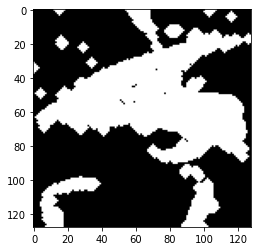

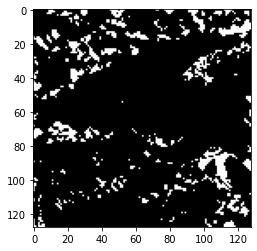

In [10]:
img_gray = bgr_to_gray(img)
img_tophat = tophat_transform(img_gray, 3)
plt.imshow(img_tophat, cmap="gray", vmin=0, vmax=255)
plt.show()